## Earthquake Events 2023

In [43]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [44]:
#Loading the dataset and viewing the first few records to understand its structure and contents.
data = pd.read_csv('earthquake_data.csv')
data.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,11/21/2023 17:43,31.592,-104.549,3,2.7,WESTERN,TEXAS
1,11/21/2023 17:31,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA
2,11/21/2023 17:27,31.647,-104.017,5,2.9,WESTERN,TEXAS
3,11/21/2023 17:01,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA
4,11/21/2023 16:56,-4.320,130.810,10,3.3,BANDA,SEA


In [45]:
# Data Summary
numerical_summary = data.describe()
numerical_summary

,Latitude,Longitude,Depth,Magnitude
count,53539.000000,53539.000000,53539.000000,53539.000000
mean,21.120630,-15.421862,35.799959,2.962569
std,25.645429,93.129891,67.580186,0.893910
min,-65.899000,-179.992000,-4.000000,-0.700000
25%,8.485000,-94.570000,6.000000,2.300000
50%,29.320000,-8.373000,10.000000,2.900000
75%,38.470000,37.460000,32.000000,3.500000
max,85.330000,180.000000,750.000000,7.700000


## Data Cleaning and Pre-processing

In [46]:
#Checking for missing values(It seems there is none :))
data.isnull().any()

Date & Time    False
Latitude       False
Longitude      False
Depth          False
Magnitude      False
Lands          False
Country        False
dtype: bool

In [47]:
# Ensuring latitude and longitude values fall in universal bounds.
latitude_range = (-90, 90)
longitude_range = (-180, 180)

invalid_latitude = data[(data['Latitude'] < latitude_range[0]) | (data['Latitude'] > latitude_range[1])]

# Check if longitude values fall within the expected range
invalid_longitude = data[(data['Longitude'] < longitude_range[0]) | (data['Longitude'] > longitude_range[1])]

if not invalid_latitude.empty:
    print("Invalid Latitude Values:")
    print(invalid_latitude)
else:
    print("All Latitude Values are within the expected range.")

if not invalid_longitude.empty:
    print("\nInvalid Longitude Values:")
    print(invalid_longitude)
else:
    print("All Longitude Values are within the expected range.")


All Latitude Values are within the expected range.
All Longitude Values are within the expected range.


## Analysis

Date & Time    datetime64[ns]
Latitude              float64
Longitude             float64
Depth                   int64
Magnitude             float64
Lands                  object
Country                object
dtype: object


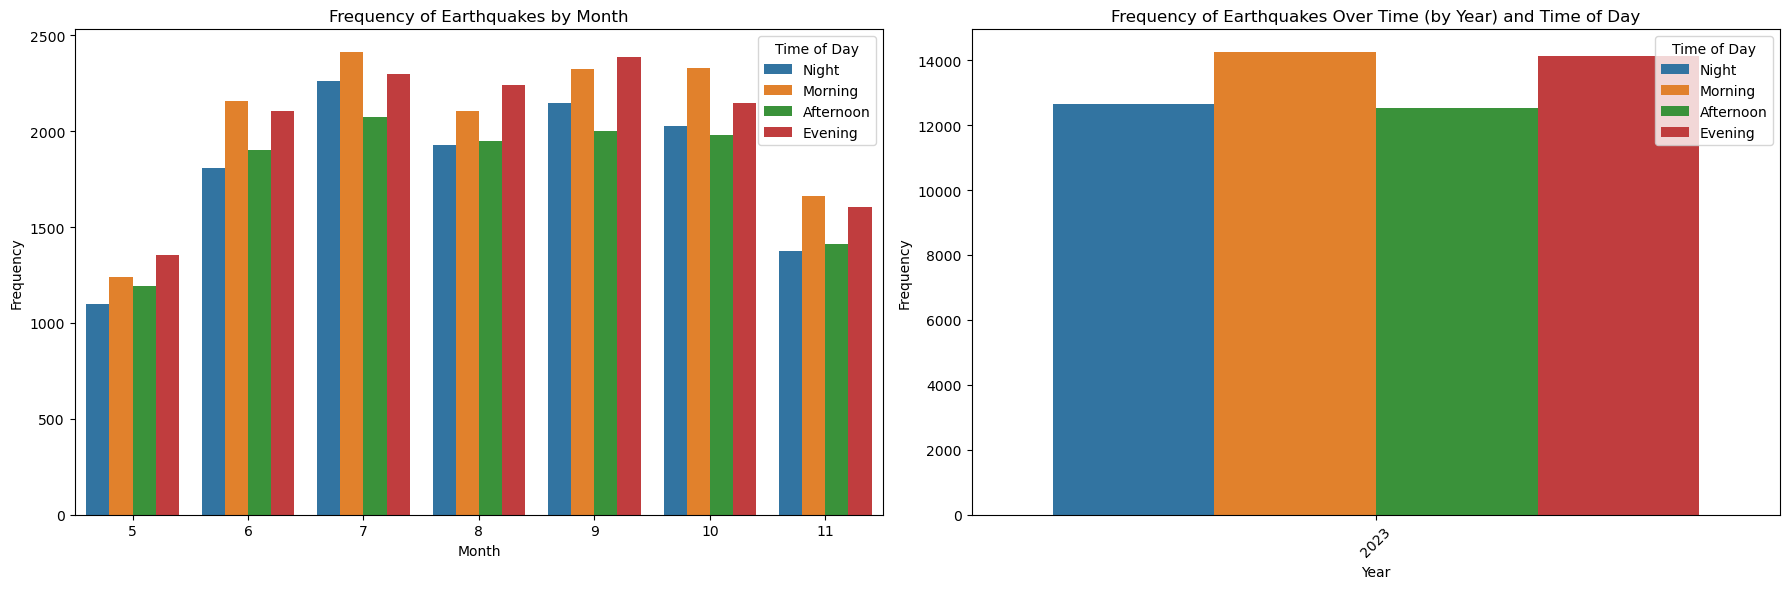

In [48]:
#Convert Data Types(Converting date column to datetime for easier manipulation for later)
#Plot the frequency of earthquakes over time to analyze
#First did it for only year and month,then I classified it based on different time periods of the day.
data['Date & Time'] = pd.to_datetime(data['Date & Time'])
print(data.dtypes)

data['Year'] = data['Date & Time'].dt.year
data['Month'] = data['Date & Time'].dt.month
data['Hour'] = data['Date & Time'].dt.hour

time_periods = ['Night', 'Morning', 'Afternoon', 'Evening']
hour_bins = [0, 6, 12, 18, 24]
data['Time of Day'] = pd.cut(data['Hour'], bins=hour_bins, labels=time_periods, right=False)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Month', hue='Time of Day', data=data)
plt.title('Frequency of Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(x='Year', hue='Time of Day', data=data)
plt.title('Frequency of Earthquakes Over Time (by Year) and Time of Day')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')

plt.tight_layout()
plt.show()

In [49]:
#Plot above got me thinking because there wasnt any data shown before the 5th month,so I just wanted to double check.
earlier_than_may = data[data['Date & Time'].dt.month < 5]
earlier_than_may

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country,Year,Month,Hour,Time of Day


C:\Users\obagi\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


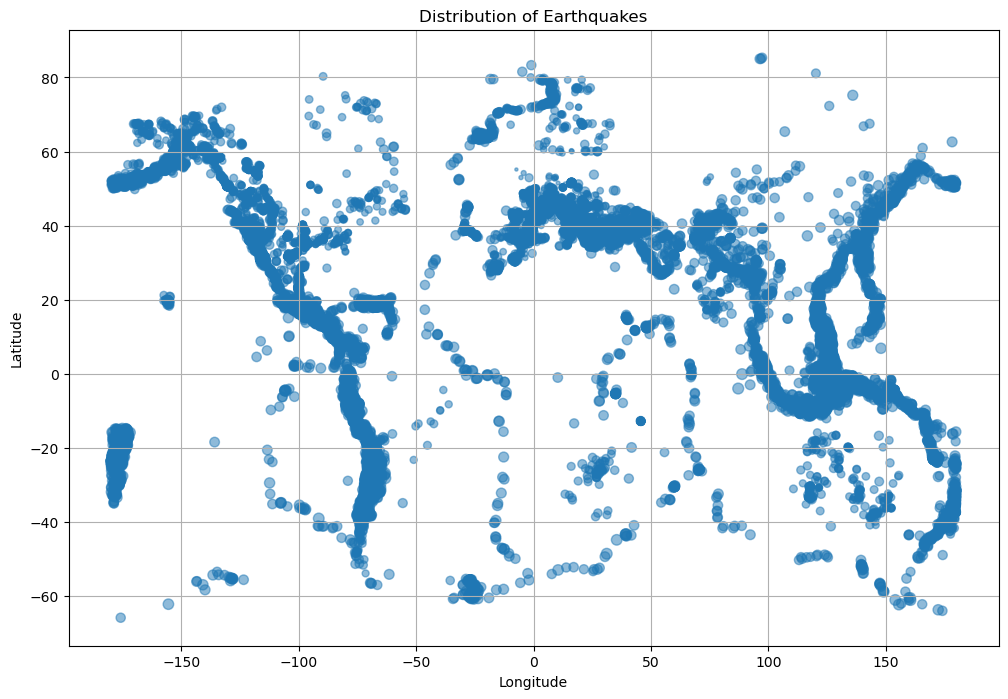

In [50]:
# Geospatial Analysis
# Finding out where earthquakes most happen

# Plot the distribution of earthquakes on a map
plt.figure(figsize=(12, 8))
plt.scatter(data['Longitude'], data['Latitude'], s=data['Magnitude']*10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Earthquakes')
plt.grid(True)
plt.show()

C:\Users\obagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


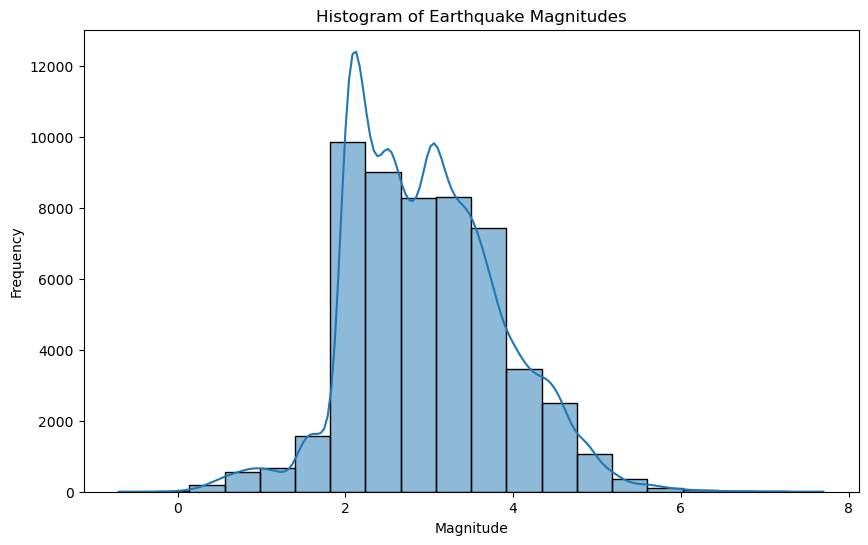

In [51]:
# Magnitude Analysis

# Plot histogram of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(data['Magnitude'], bins=20, kde=True)
plt.title('Histogram of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

C:\Users\obagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


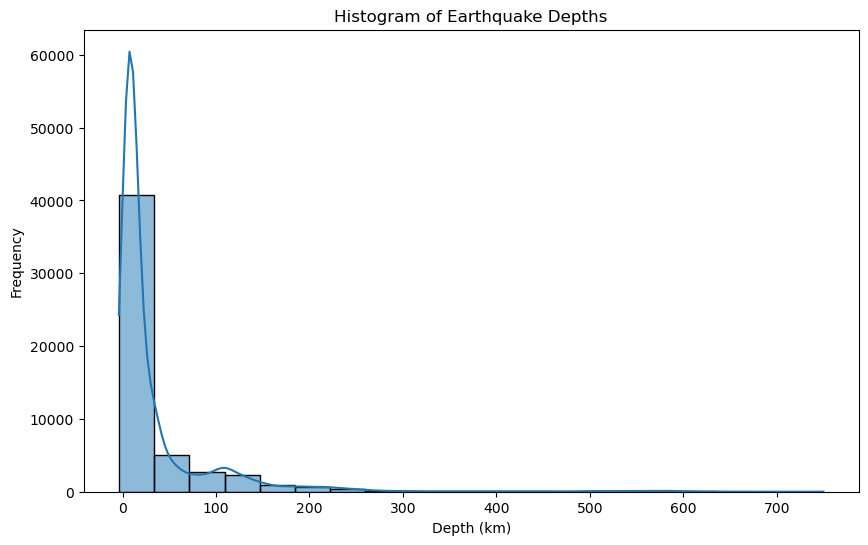

In [52]:
# Depth Analysis

# Plot histogram of earthquake depths
plt.figure(figsize=(10, 6))
sns.histplot(data['Depth'], bins=20, kde=True)
plt.title('Histogram of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

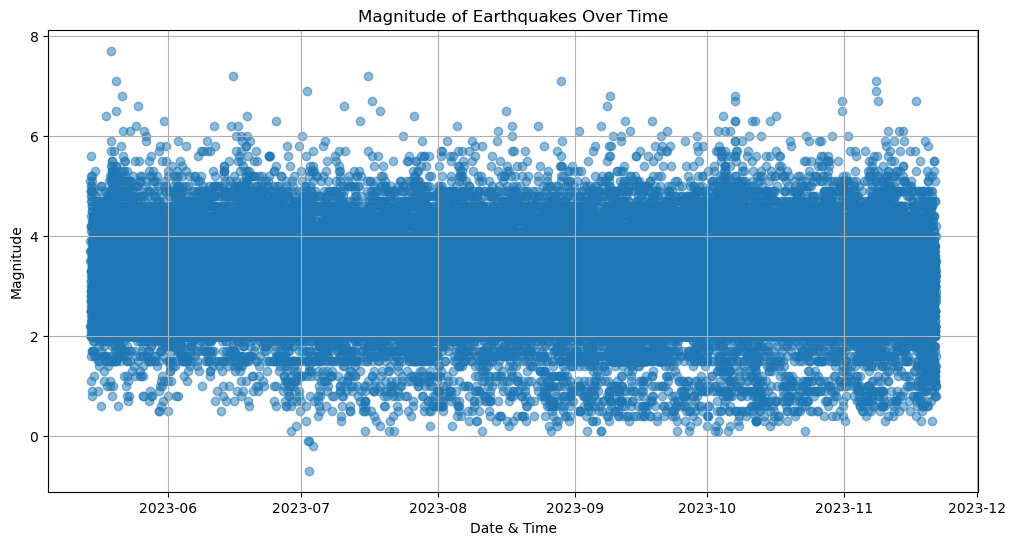

In [53]:
# Magnitude-Time Analysis
# Magnitude-Time Analysis to find out Is there any spesific time periods where big earthquakes happen

# Plot the magnitude of earthquakes over time
plt.figure(figsize=(12, 6))
plt.scatter(data['Date & Time'], data['Magnitude'], alpha=0.5)
plt.xlabel('Date & Time')
plt.ylabel('Magnitude')
plt.title('Magnitude of Earthquakes Over Time')
plt.grid(True)
plt.show()

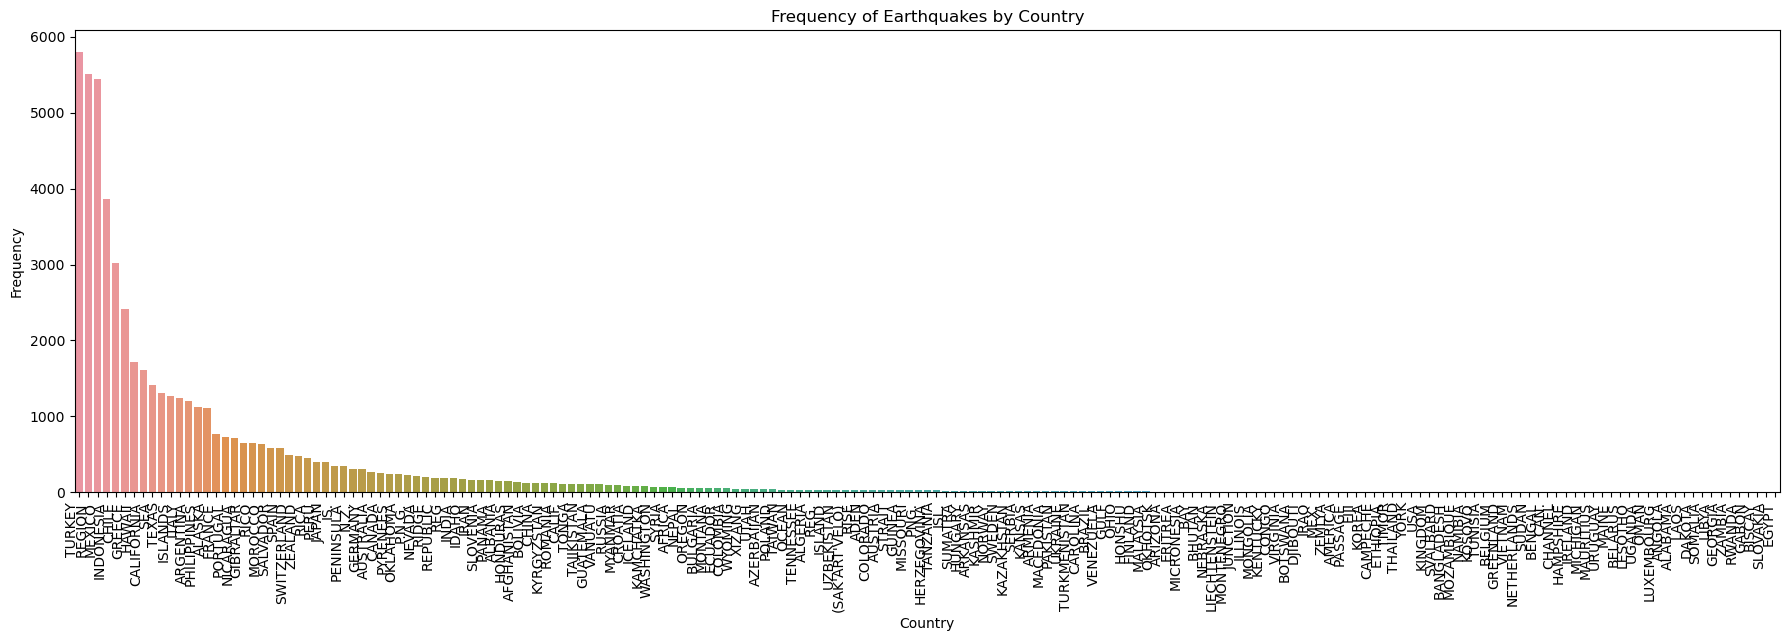

In [54]:
# Country Analysis

# Plot the frequency of earthquakes by country
plt.figure(figsize=(22, 6))
sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index)
plt.title('Frequency of Earthquakes by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right') 

plt.show()

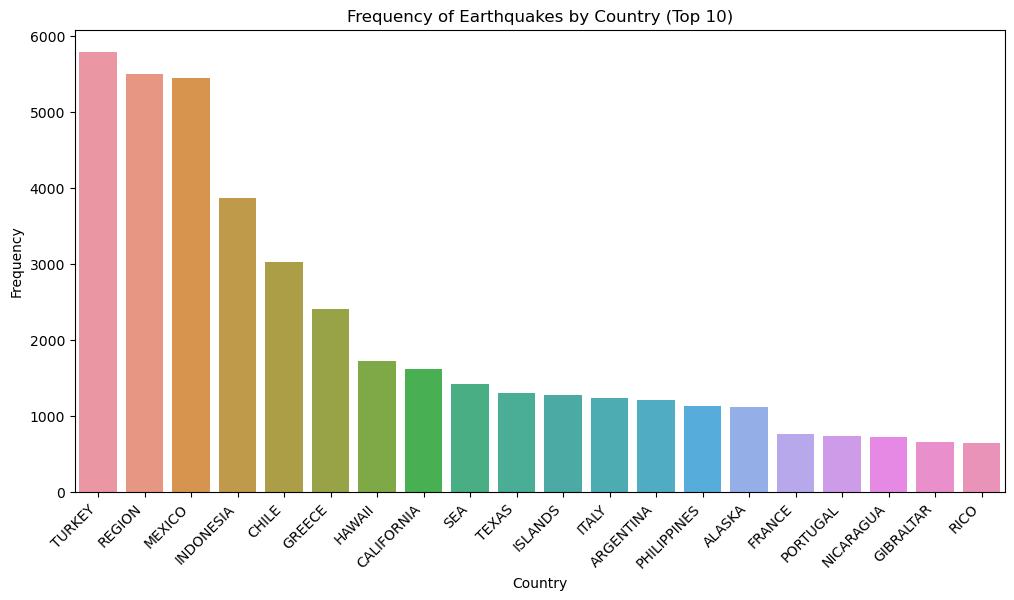

In [55]:
# Edited version of the plot above.There was so many countries so 
# it didnt really fit the x-axis so I only choose top 20,and it seems turkey is the country that had most of the earthquakes in 2023

top_countries = data['Country'].value_counts().nlargest(20).index
filtered_data = data[data['Country'].isin(top_countries)]

# Plot the frequency of earthquakes by country
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=filtered_data, order=top_countries)
plt.title('Frequency of Earthquakes by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [64]:
# Second place is region after turkey and it got me thinking,realized that there was missed data,Country column is filled with the word 'Region'
region = data[data['Country'] == 'REGION']
region

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country,Year,Month,Hour,Time of Day
16,2023-11-21 15:28:00,63.890,-22.390,1,3.5,ICELAND,REGION,2023,11,15,Afternoon
106,2023-11-21 09:03:00,8.284,-82.753,11,3.1,"PANAMA-COSTA, RICA, BORDER",REGION,2023,11,9,Morning
113,2023-11-21 08:36:00,29.309,-14.789,18,2.7,"CANARY, ISLANDS,, SPAIN",REGION,2023,11,8,Morning
119,2023-11-21 07:49:00,8.318,-82.926,16,2.8,"PANAMA-COSTA, RICA, BORDER",REGION,2023,11,7,Morning
143,2023-11-21 05:14:00,63.880,-22.390,1,3.8,ICELAND,REGION,2023,11,5,Night
...,...,...,...,...,...,...,...,...,...,...,...
53514,2023-05-14 11:29:00,33.240,139.260,15,4.8,"IZU, ISLANDS,, JAPAN",REGION,2023,5,11,Morning
53524,2023-05-14 10:46:00,17.930,-66.970,16,2.3,"PUERTO, RICO",REGION,2023,5,10,Morning
53527,2023-05-14 10:26:00,35.260,32.680,15,2.5,CYPRUS,REGION,2023,5,10,Morning
53530,2023-05-14 10:12:00,9.200,-82.200,1,2.8,"PANAMA-COSTA, RICA, BORDER",REGION,2023,5,10,Morning


In [57]:
# Dropping the region columns because it was from multiple countries

region_dropped = data.drop(data[data['Country'] == 'REGION'].index)
num_rows = region_dropped.shape[0]
num_rows


48033

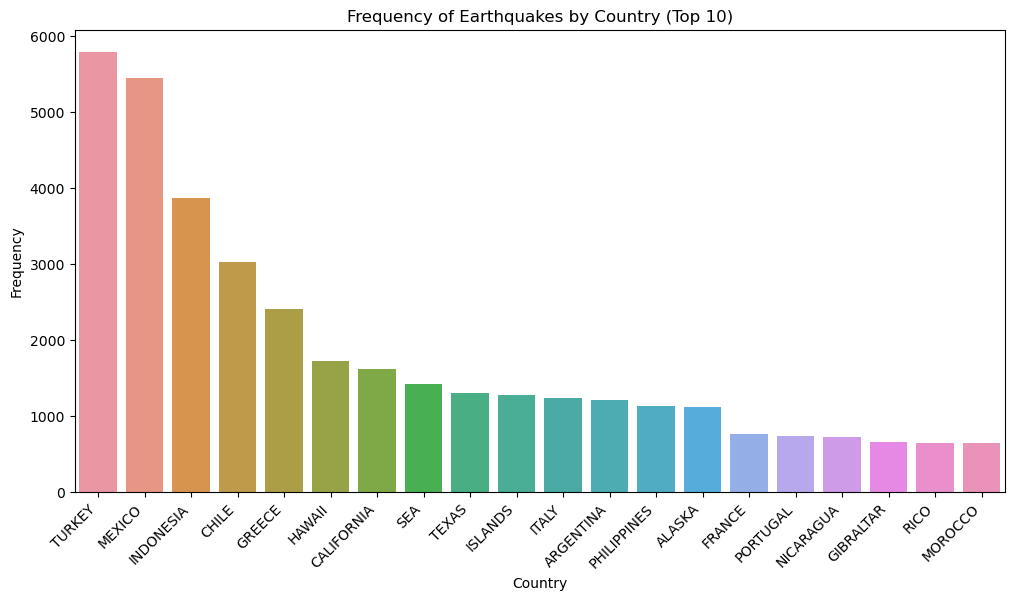

In [58]:
# Plotting top countries again in the right way!
top_countries = region_dropped['Country'].value_counts().nlargest(20).index
filtered_data = region_dropped[region_dropped['Country'].isin(top_countries)]

# Plot the frequency of earthquakes by country
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=filtered_data, order=top_countries)
plt.title('Frequency of Earthquakes by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

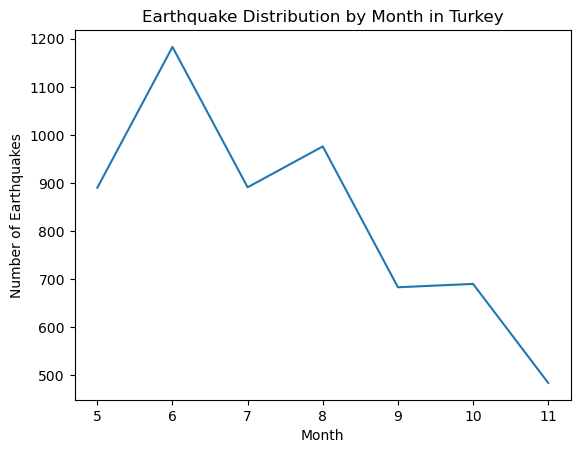

In [60]:
# Filtering Turkey's data for deeper investigation since its the country that had most of the earthquakes in 2023,in addition Im a turkish person

turkey_data = data[data["Country"] == "TURKEY"]
# Count the number of earthquakes per month in Turkey
monthly_counts_turkey = turkey_data["Month"].value_counts().sort_index()
# Plot the number of earthquakes per month in Turkey
plt.plot(monthly_counts_turkey.index, monthly_counts_turkey.values)
plt.xlabel("Month")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Distribution by Month in Turkey")
plt.show()

In [61]:
# After plotting above,I did the plot below but 'near coast of western' was saved as 'near,coast,of,western' and it didnt look cool in the plot,so Im replacing ',' with empty string ''

turkey_data['Lands'].unique()
turkey_data['Lands'] = turkey_data['Lands'].str.replace(',', '')


C:\Users\obagi\AppData\Local\Temp\ipykernel_35072\159033838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_data['Lands'] = turkey_data['Lands'].str.replace(',', '')


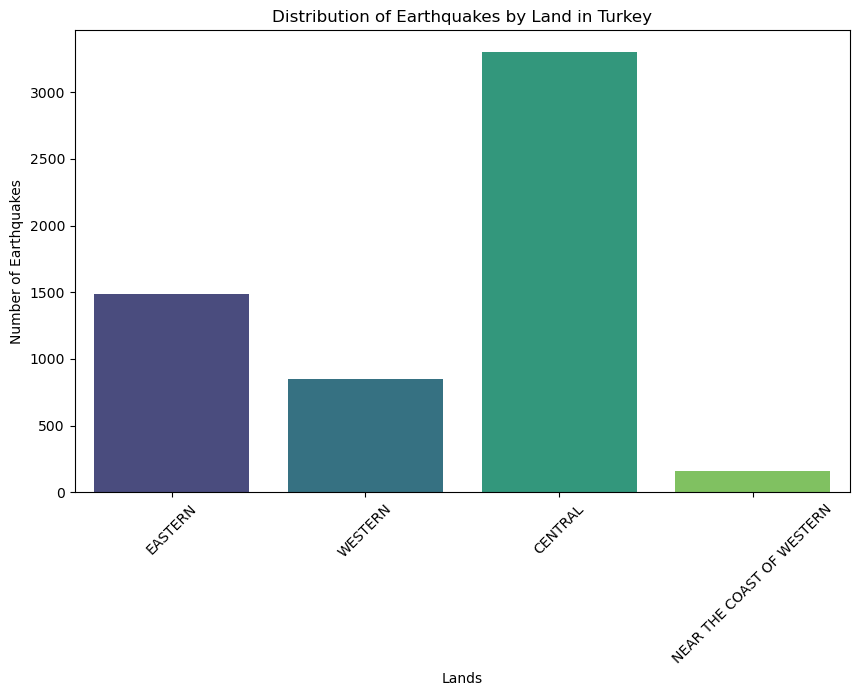

In [62]:
import seaborn as sns

# Plot the distribution of earthquakes by land in Turkey
plt.figure(figsize=(10, 6))
sns.countplot(x='Lands', data=turkey_data, palette='viridis')
plt.xlabel('Lands')
plt.ylabel('Number of Earthquakes')
plt.title('Distribution of Earthquakes by Land in Turkey')
plt.xticks(rotation=45)
plt.show()
